<a href="https://colab.research.google.com/github/MPGarg/Assignment-13/blob/main/EVA8_Assigment_13_Part_1_Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
#from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#!pip install -U albumentations
!pip install torch_lr_finder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [3]:
!git clone https://github.com/MPGarg/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 275 (delta 49), reused 87 (delta 42), pack-reused 178
Receiving objects: 100% (275/275), 87.45 KiB | 2.08 MiB/s, done.
Resolving deltas: 100% (130/130), done.


# Unet class is imported

In [4]:
from main_repo.models import unet
from main_repo.models.unet import UNet

# Import Other fuctions

In [5]:
from main_repo import main, utils, utils_unet
from main_repo.utils import *    
from main_repo.utils_unet import *
from main_repo.main import *

# Assign device

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [7]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [8]:
from torchsummary import summary
view_model = UNet(3,3).to(device)
summary(view_model, input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
            Conv2d-4         [-1, 64, 128, 128]          36,928
       BatchNorm2d-5         [-1, 64, 128, 128]             128
              ReLU-6         [-1, 64, 128, 128]               0
         MaxPool2d-7           [-1, 64, 64, 64]               0
  ContractingBlock-8  [[-1, 64, 64, 64], [-1, 64, 128, 128]]               0
            Conv2d-9          [-1, 128, 64, 64]          73,856
      BatchNorm2d-10          [-1, 128, 64, 64]             256
             ReLU-11          [-1, 128, 64, 64]               0
           Conv2d-12          [-1, 128, 64, 64]         147,584
      BatchNorm2d-13          [-1, 128, 64, 64]             256
             ReLU-14      

In [8]:
trainset,trainloader,testset,testloader = tl_ts_mod_unet()

100%|██████████| 791918971/791918971 [00:26<00:00, 29595838.16it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 15210960.70it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


# Show sample images and Load dataset

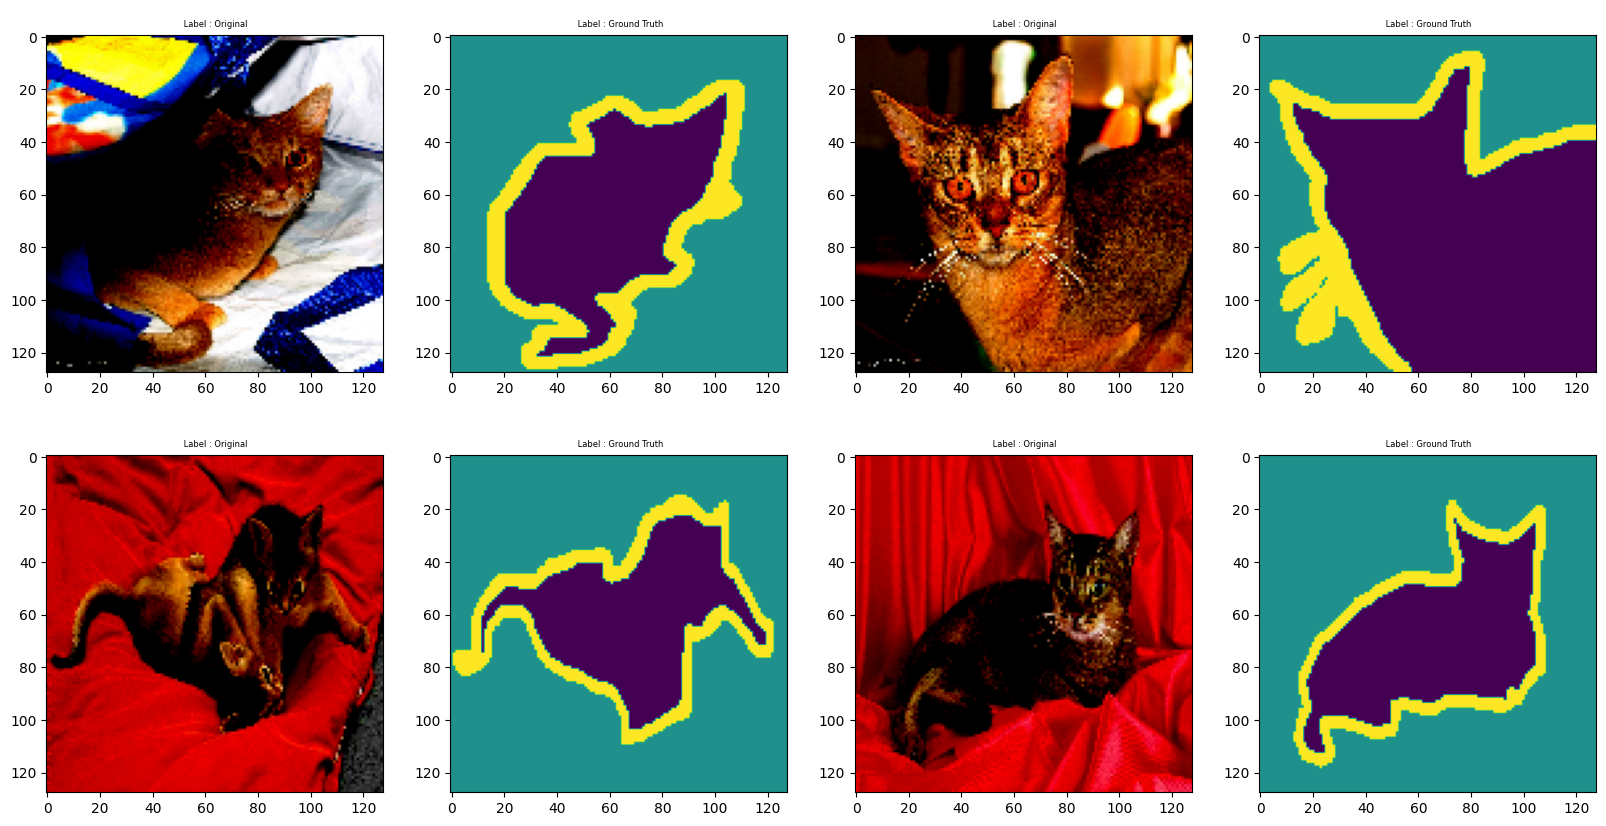

In [10]:
show_sample_unet(trainset)

#MP+Tr+BCE

In [11]:
model = UNet(3,3).to(device)

In [12]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=ler_rate)


In [13]:
model_tr1, train_losses1, test_losses1 = fit_model_unet(
                                                model=model, 
                                                device=device,
                                                trainloader=trainloader, 
                                                testloader=None,
                                                criterion = nn.BCEWithLogitsLoss(), #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None
                                                
                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=59.478088319301605 Accuracy=80.34975051879883

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.83it/s]


Training Loss=40.064759373664856 Accuracy=90.51701354980469

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=32.1774160861969 Accuracy=94.50167274475098

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:43<00:00,  2.66it/s]


Training Loss=28.153092324733734 Accuracy=97.22128295898438

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:41<00:00,  2.74it/s]


Training Loss=26.62859797477722 Accuracy=98.1444091796875

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:43<00:00,  2.66it/s]


Training Loss=24.921161845326424 Accuracy=99.40037536621094

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:43<00:00,  2.67it/s]


Training Loss=23.88569611310959 Accuracy=100.00900459289551

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:43<00:00,  2.65it/s]


Training Loss=22.514977514743805 Accuracy=100.90952682495117

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.70it/s]


Training Loss=22.202701419591904 Accuracy=101.10273170471191

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.70it/s]


Training Loss=21.431732207536697 Accuracy=101.61569786071777

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:43<00:00,  2.66it/s]


Training Loss=20.288113489747047 Accuracy=102.41292381286621

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.69it/s]


Training Loss=19.867096826434135 Accuracy=102.6197738647461

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.70it/s]


Training Loss=18.920153617858887 Accuracy=103.22529983520508

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.69it/s]


Training Loss=18.20087805390358 Accuracy=103.68498802185059

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.69it/s]


Training Loss=17.411484263837337 Accuracy=104.17727851867676


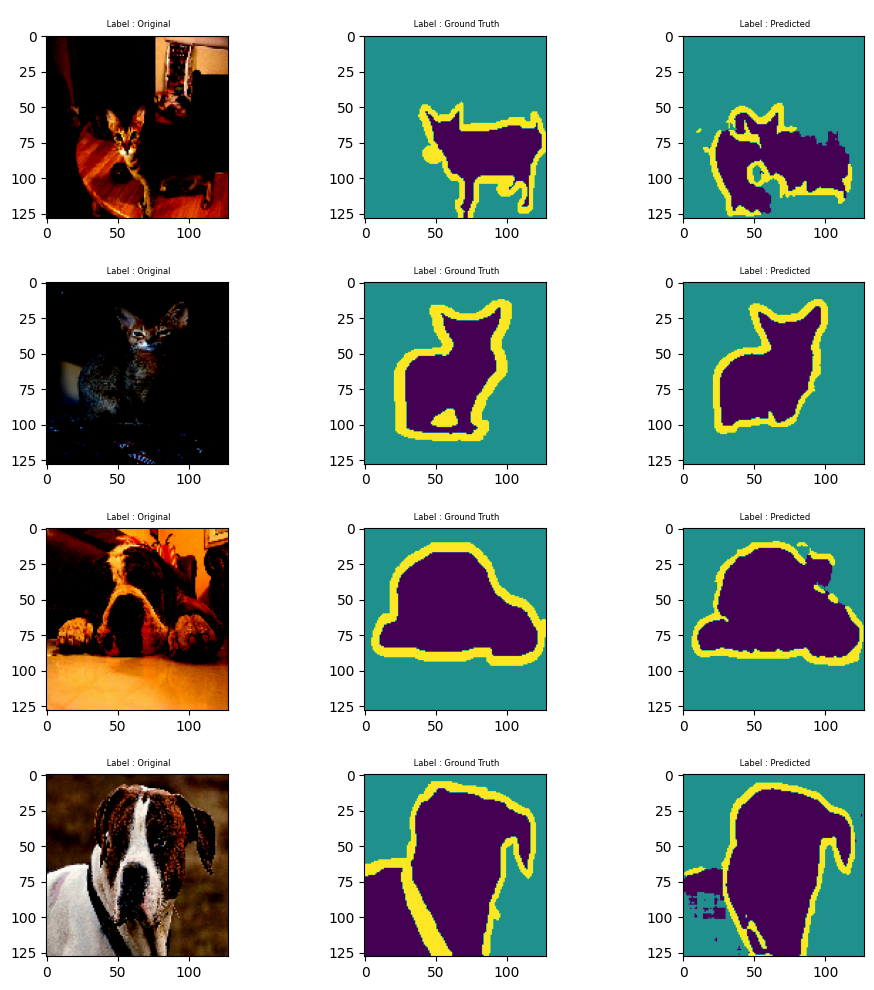

In [14]:
show_sample_output_unet(model_tr1,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

## Display Validation Accuracy & Loss

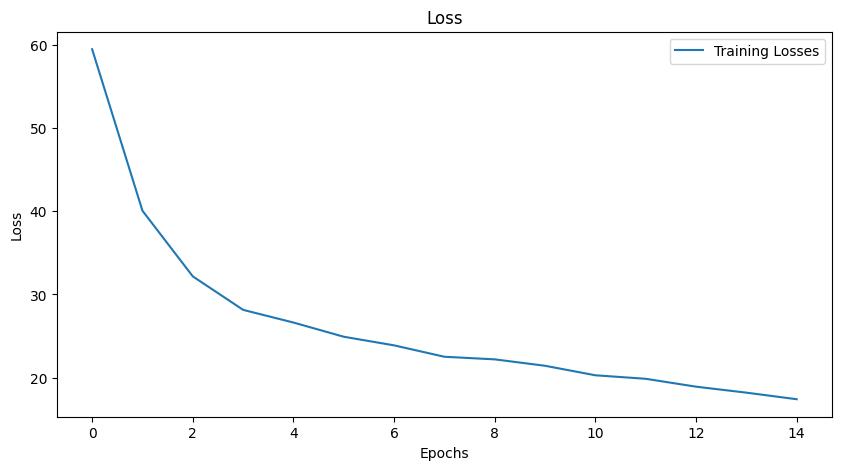

In [15]:
plot_acc_loss_unet(train_losses1)    

# MP+Tr+Dice Loss

In [16]:
model2 = UNet(3,3).to(device)

In [17]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model2.parameters(), lr=ler_rate)

In [18]:
model_tr2, train_losses2, test_losses2 = fit_model_unet(
                                                model=model2, 
                                                device=device,
                                                trainloader=trainloader, 
                                                testloader=None,
                                                criterion = dice_loss, #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None
                                                
                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:41<00:00,  2.78it/s]


Training Loss=-5943.011978507042 Accuracy=53.18061637878418

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:41<00:00,  2.76it/s]


Training Loss=-4562.536464691162 Accuracy=17.647205352783203

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.71it/s]


Training Loss=-5062.252250671387 Accuracy=15.375232696533203

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.73it/s]


Training Loss=-5557.707492828369 Accuracy=13.906145095825195

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.72it/s]


Training Loss=-6164.906669616699 Accuracy=12.686534881591797

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.70it/s]


Training Loss=-6956.0575523376465 Accuracy=11.751787185668945

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.72it/s]


Training Loss=-8223.025192260742 Accuracy=10.584827423095703

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.72it/s]


Training Loss=-10439.097175598145 Accuracy=10.11262321472168

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.71it/s]


Training Loss=-34496.49153590202 Accuracy=12.888456344604492

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.68it/s]


Training Loss=-1448.2321535348892 Accuracy=74.93242835998535

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.72it/s]


Training Loss=-2077.87105178833 Accuracy=81.51015281677246

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.72it/s]


Training Loss=-2343.308153152466 Accuracy=84.09437561035156

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.72it/s]


Training Loss=-2470.186441421509 Accuracy=86.15324783325195

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.71it/s]


Training Loss=-2587.903762817383 Accuracy=88.31596755981445

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:42<00:00,  2.70it/s]


Training Loss=-2660.5087814331055 Accuracy=89.55351638793945


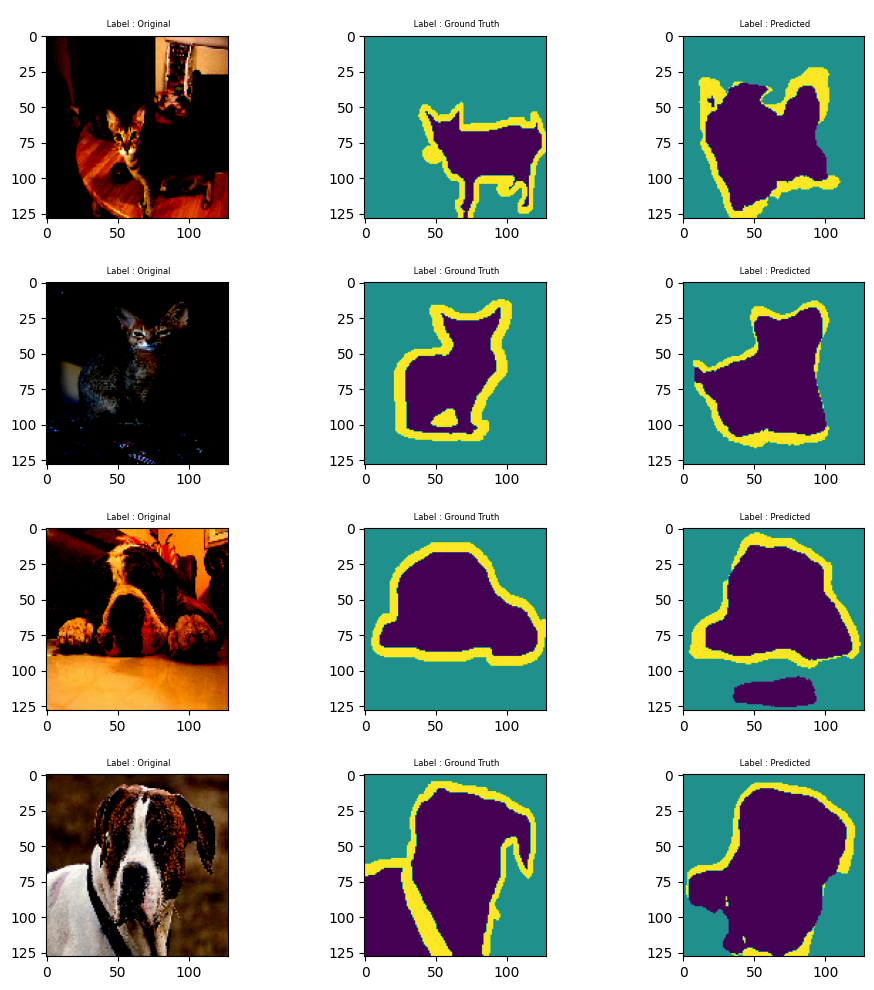

In [19]:
show_sample_output_unet(model_tr2,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

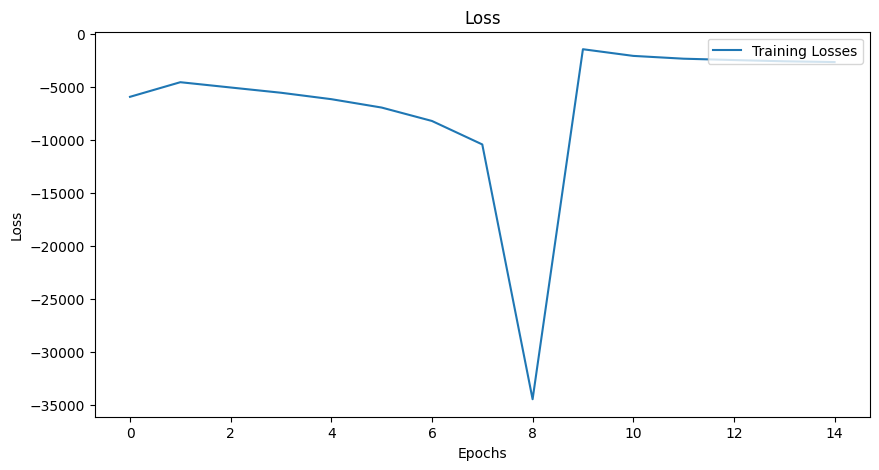

In [20]:
plot_acc_loss_unet(train_losses2) 

# StrConv+Tr+BCE

In [21]:
model3 = UNet(3,3,pool='StrConv').to(device)

In [22]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model3.parameters(), lr=ler_rate)

In [23]:
model_tr3, train_losses3, test_losses3 = fit_model_unet(
                                                model=model3, 
                                                device=device,
                                                trainloader=trainloader, 
                                                testloader=None,
                                                criterion = nn.BCEWithLogitsLoss(), #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None
                                                
                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=60.88451662659645 Accuracy=79.63145637512207

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.60it/s]


Training Loss=42.17142742872238 Accuracy=88.66768455505371

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.57it/s]


Training Loss=34.95245100557804 Accuracy=92.45824813842773

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=31.042249351739883 Accuracy=95.18667602539062

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=28.820978090167046 Accuracy=96.6415958404541

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.57it/s]


Training Loss=27.237096533179283 Accuracy=97.72176361083984

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=25.832575604319572 Accuracy=98.69971466064453

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.57it/s]


Training Loss=24.748764038085938 Accuracy=99.36256980895996

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=23.85508757829666 Accuracy=99.98524284362793

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:45<00:00,  2.55it/s]


Training Loss=23.080459415912628 Accuracy=100.50494384765625

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=22.520031958818436 Accuracy=100.90606880187988

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=22.112289771437645 Accuracy=101.1464729309082

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=21.24065762758255 Accuracy=101.7174015045166

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=21.010980263352394 Accuracy=101.85306358337402

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=20.538783133029938 Accuracy=102.1458797454834


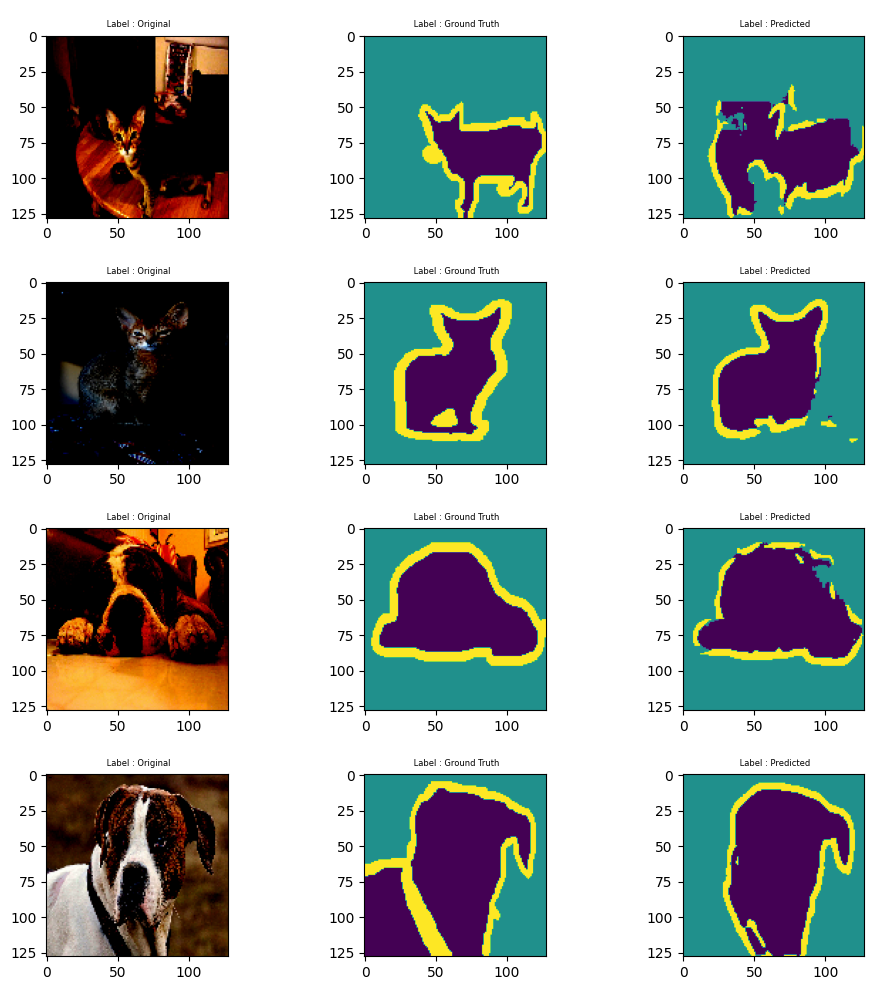

In [24]:
show_sample_output_unet(model_tr3,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

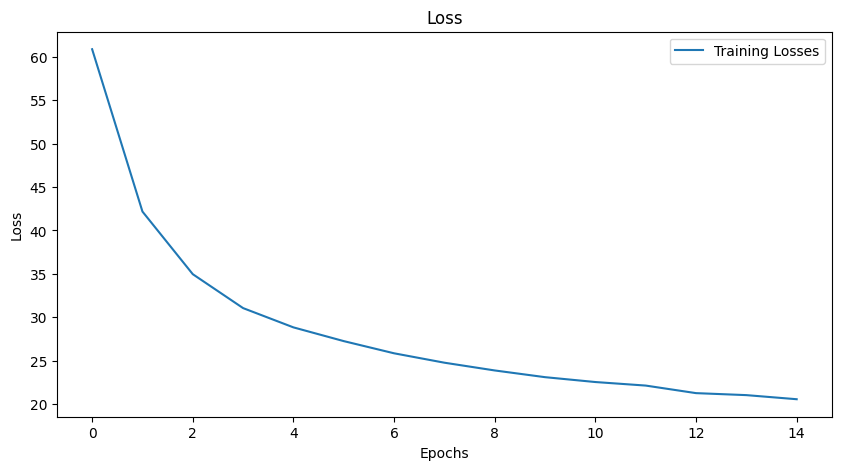

In [25]:
plot_acc_loss_unet(train_losses3) 

# StrConv+Ups+Dice Loss

In [26]:
model4 = UNet(3,3,mode='upsample',pool='StrConv').to(device)

In [27]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model4.parameters(), lr=ler_rate)

In [28]:
model_tr4, train_losses4, test_losses4 = fit_model_unet(
                                                model=model4, 
                                                device=device,
                                                trainloader=trainloader, 
                                                testloader=None,
                                                criterion = dice_loss, #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None
                                                
                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.57it/s]


Training Loss=-1720.5611929297447 Accuracy=57.679243087768555

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.60it/s]


Training Loss=-2606.1354122161865 Accuracy=21.5167179107666

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.60it/s]


Training Loss=-4035.3504428863525 Accuracy=17.625301361083984

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=-4452.733063697815 Accuracy=57.444570541381836

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=-2473.414281845093 Accuracy=83.25868797302246

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=-3066.6886253356934 Accuracy=84.59391403198242

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=-4164.972826004028 Accuracy=86.05937004089355

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=-4665.836067199707 Accuracy=60.176368713378906

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.60it/s]


Training Loss=-1414.5348529815674 Accuracy=21.39593505859375

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=-1563.1576414108276 Accuracy=19.514123916625977

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=-1714.4194192886353 Accuracy=18.394092559814453

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.59it/s]


Training Loss=-1886.3071126937866 Accuracy=17.439584732055664

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=-2078.613510131836 Accuracy=16.587217330932617

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:44<00:00,  2.58it/s]


Training Loss=-2330.6350593566895 Accuracy=15.918661117553711

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:45<00:00,  2.56it/s]


Training Loss=-2677.253952026367 Accuracy=15.255859375


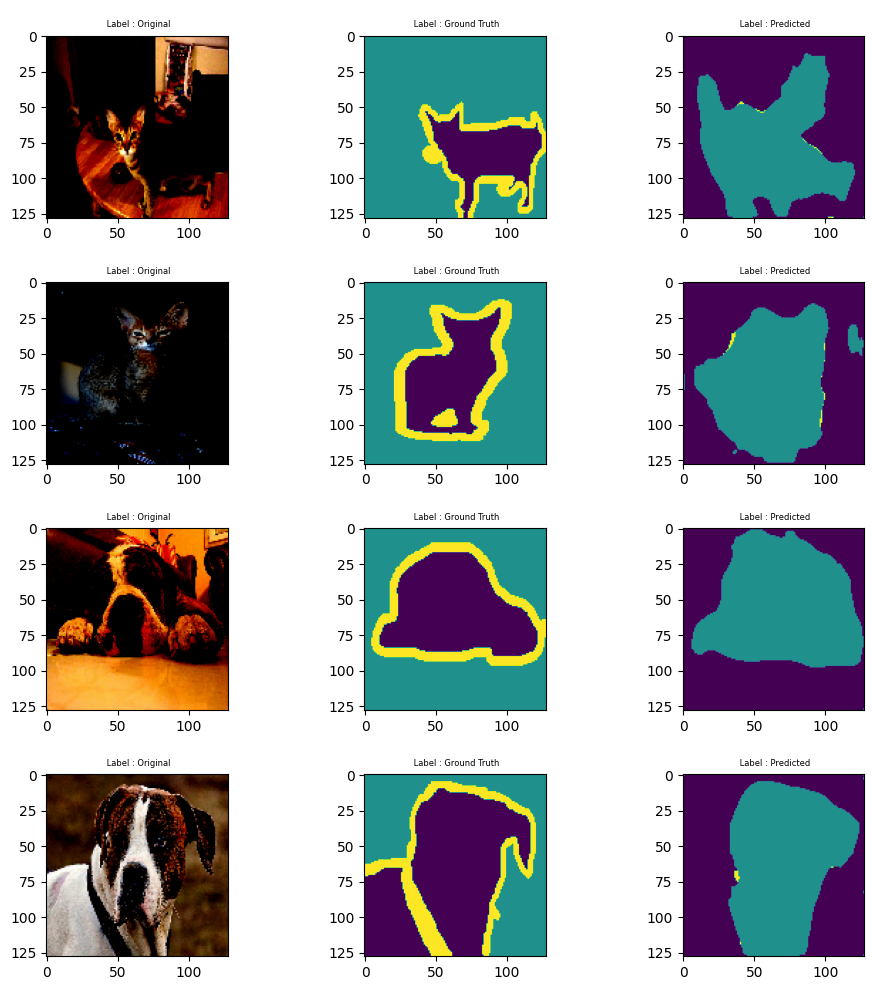

In [29]:
show_sample_output_unet(model_tr4,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

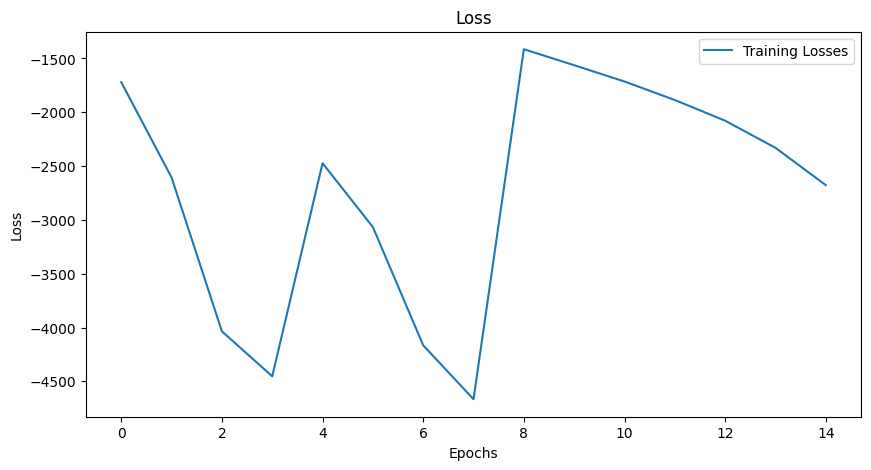

In [30]:
plot_acc_loss_unet(train_losses4)

# MP+Tr+CE

In [9]:
model5 = UNet(3,3).to(device)

In [10]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model5.parameters(), lr=ler_rate)

In [13]:
model_tr5, train_losses5, test_losses5 = fit_model_unet(
                                                model=model5, 
                                                device=device,
                                                trainloader=trainloader, 
                                                testloader=None,
                                                criterion = nn.CrossEntropyLoss(), #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None,
                                                loss_cr = 'CE'                                                
                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=88.96638369560242 Accuracy=80.28194618225098

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.95it/s]


Training Loss=67.82037827372551 Accuracy=88.67439842224121

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:41<00:00,  2.77it/s]


Training Loss=55.89932790398598 Accuracy=93.16229248046875

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=49.15743747353554 Accuracy=95.73041915893555

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.93it/s]


Training Loss=45.3797510266304 Accuracy=97.28782653808594

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.91it/s]


Training Loss=41.867936193943024 Accuracy=98.68647956848145

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.94it/s]


Training Loss=39.84265212714672 Accuracy=99.49727439880371

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.94it/s]


Training Loss=38.542555183172226 Accuracy=100.01670265197754

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.92it/s]


Training Loss=35.45115506649017 Accuracy=101.18950843811035

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.93it/s]


Training Loss=34.65042731165886 Accuracy=101.45874214172363

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.94it/s]


Training Loss=32.941759899258614 Accuracy=102.1954174041748

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.94it/s]


Training Loss=31.459003910422325 Accuracy=102.73311614990234

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.94it/s]


Training Loss=30.822390154004097 Accuracy=102.97634315490723

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.94it/s]


Training Loss=29.356380850076675 Accuracy=103.51016426086426

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.94it/s]


Training Loss=28.1471529006958 Accuracy=103.98152542114258


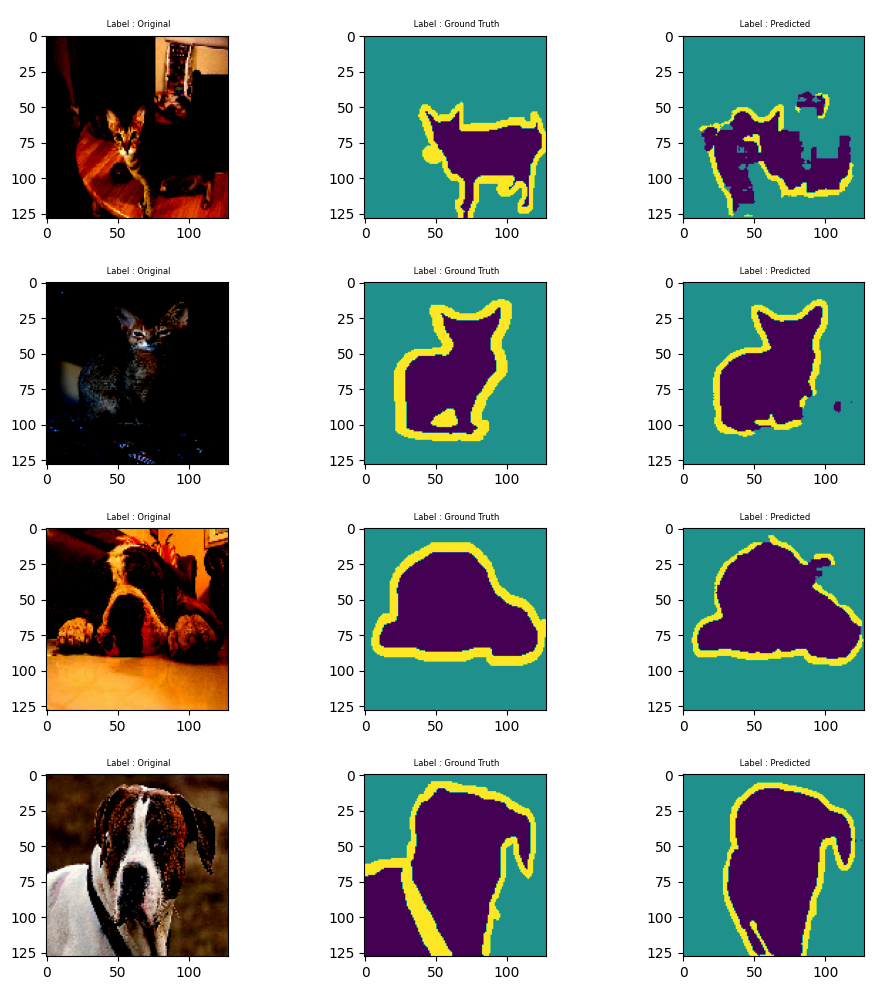

In [14]:
show_sample_output_unet(model_tr5,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

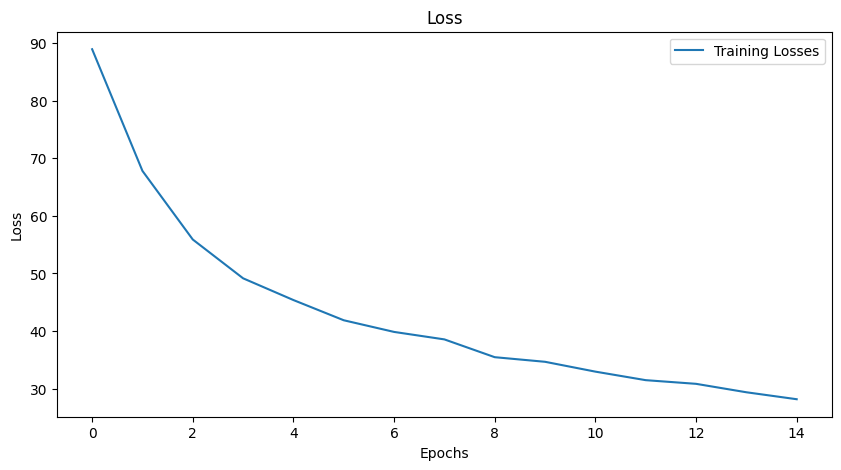

In [15]:
plot_acc_loss_unet(train_losses5)

# StrConv+Ups+Dice Loss- Low LR

In [16]:
model6 = UNet(3,3,mode='upsample',pool='StrConv').to(device)

In [17]:
ler_rate = 0.0001
optimizer = torch.optim.Adam(model6.parameters(), lr=ler_rate)

In [18]:
model_tr6, train_losses6, test_losses6 = fit_model_unet(
                                                model=model6, 
                                                device=device,
                                                trainloader=trainloader, 
                                                testloader=None,
                                                criterion = dice_loss, #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None
                                                
                                            )


 EPOCH: 1 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.82it/s]


Training Loss=-300.4628881216049 Accuracy=80.18361473083496

 EPOCH: 2 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=-677.9840312004089 Accuracy=90.73630905151367

 EPOCH: 3 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.83it/s]


Training Loss=-1452.5944080352783 Accuracy=93.92377090454102

 EPOCH: 4 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.82it/s]


Training Loss=-12087.249618530273 Accuracy=45.43512535095215

 EPOCH: 5 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=-15185.991256713867 Accuracy=13.279203414916992

 EPOCH: 6 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=-20042.076614379883 Accuracy=10.248157501220703

 EPOCH: 7 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=-31693.91614675522 Accuracy=23.07065773010254

 EPOCH: 8 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=-10032.281761169434 Accuracy=87.09597587585449

 EPOCH: 9 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=-11663.397148132324 Accuracy=90.32024383544922

 EPOCH: 10 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.82it/s]


Training Loss=-13634.144340515137 Accuracy=93.75602531433105

 EPOCH: 11 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.81it/s]


Training Loss=-16288.682205200195 Accuracy=95.38980484008789

 EPOCH: 12 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.83it/s]


Training Loss=-22893.08106994629 Accuracy=96.42041397094727

 EPOCH: 13 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=-25892.559608459473 Accuracy=44.528738021850586

 EPOCH: 14 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=-13192.546844482422 Accuracy=12.90321159362793

 EPOCH: 15 (LR: 0.0001)


100%|██████████| 115/115 [00:40<00:00,  2.84it/s]


Training Loss=-15868.146507263184 Accuracy=10.384407043457031


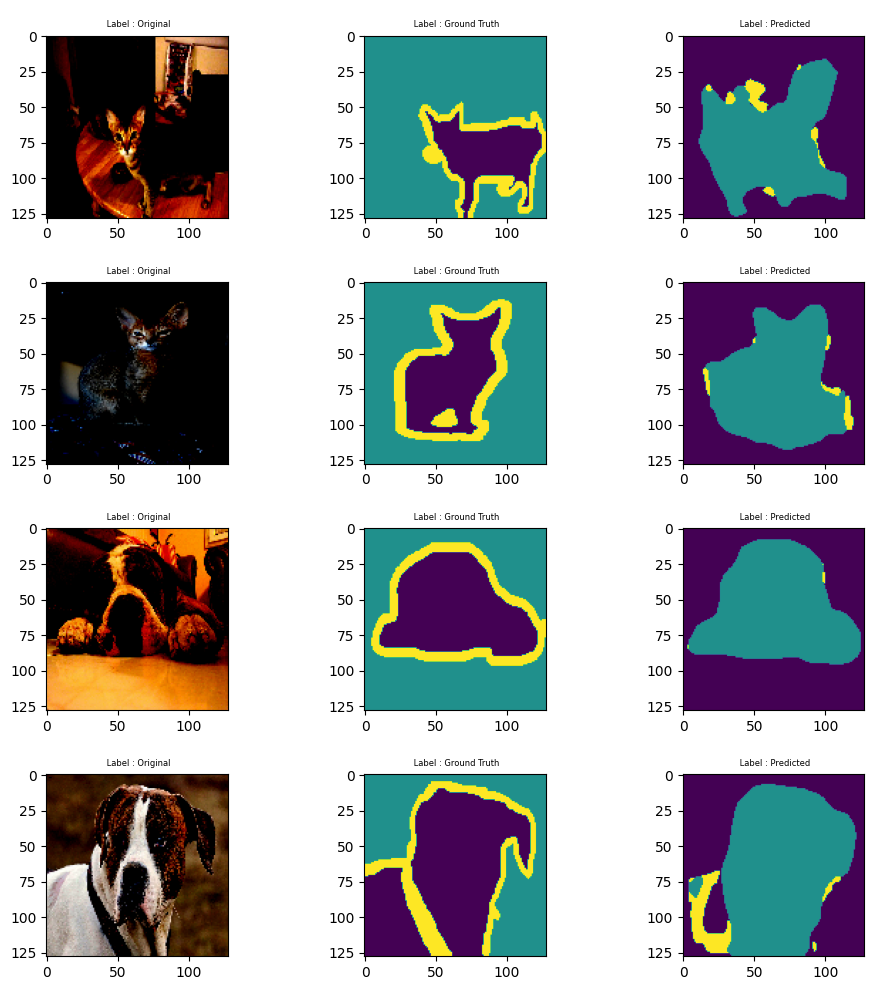

In [19]:
show_sample_output_unet(model_tr6,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

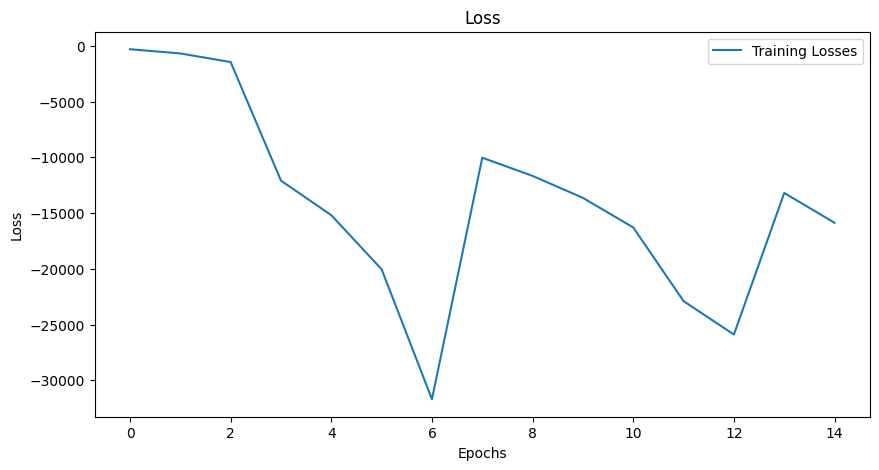

In [20]:
plot_acc_loss_unet(train_losses6)